In [1]:
import PySimpleGUI as sg
import CogBook as cog
from CogBook import label_faces
from PIL import Image
from camera import take_picture
import numpy as np
import skimage.io as io

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


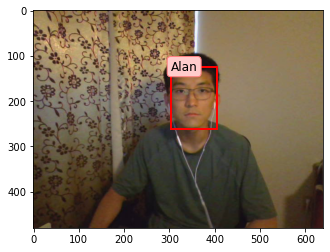

In [2]:
sg.theme('DarkAmber')   # Add a touch of color
# All the stuff inside your window.
layout = [  [sg.Radio('Upload an image', 1), sg.Radio('Take a photo with your webcam', 1)],
            [sg.Text('Select File'), sg.InputText(''), sg.FileBrowse()],
            [sg.Button('Ok'), sg.Button('Cancel')] ]

# Create the Window
window = sg.Window('Window Title', layout)
# Event Loop to process "events" and get the "values" of the inputs
while True:
    event, values = window.read()
    if event == sg.WIN_CLOSED or event == 'Cancel': # if user closes window or clicks cancel
        break
    if event == 'Ok':
        choice = values[0]
        if choice:
            filepath = values[2]
            # pic = np.array(Image.open(filepath))[:,:,:3]
            # shape-(Height, Width, Color)
            pic = io.imread(str(filepath))
            if pic.shape[-1] == 4:
                # Image is RGBA, where A is alpha -> transparency
                # Must make image RGB.
                pic = pic[..., :-1]  # png -> RGB
            label_faces(pic)
            break
        elif not choice:
            pic = take_picture()
            label_faces(pic)
            break

window.close()